## Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report


## Importing Dataset

In [3]:
data = pd.read_csv('cardio_Disease file.csv')


In [4]:
data.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0


### Data Wrangling 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62505 entries, 0 to 62504
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   62505 non-null  int64  
 1   id           62505 non-null  int64  
 2   age          62505 non-null  int64  
 3   gender       62505 non-null  int64  
 4   height       62505 non-null  int64  
 5   weight       62505 non-null  float64
 6   ap_hi        62505 non-null  int64  
 7   ap_lo        62505 non-null  int64  
 8   cholesterol  62505 non-null  int64  
 9   gluc         62505 non-null  int64  
 10  smoke        62505 non-null  int64  
 11  alco         62505 non-null  int64  
 12  active       62505 non-null  int64  
 13  cardio       62505 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 6.7 MB


In [6]:
data.describe()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000,62505.000000
mean,34977.911111,49941.600336,19493.337909,1.348564,164.406144,73.180776,126.419870,81.698904,1.357699,1.220638,0.086345,0.052172,0.804320,0.493880
std,20216.617450,28864.503664,2458.750218,0.476519,7.531365,12.272097,14.289834,7.673364,0.675192,0.567590,0.280875,0.222375,0.396727,0.499967
min,0.000000,0.000000,10859.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17411.000000,24876.000000,17724.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,34987.000000,49980.000000,19718.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,52476.000000,74849.000000,21341.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,69999.000000,99999.000000,23713.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.dtypes

Unnamed: 0       int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
data.duplicated().sum()

0

In [9]:
data.shape

(62505, 14)

In [10]:
data.isnull().sum()

Unnamed: 0     0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
data.isnull().sum().sum()

0

In [12]:
data.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [13]:
shape=data.shape 
print('Number of Rows :',shape[0])
print('Number of Columns :',shape[1])

Number of Rows : 62505
Number of Columns : 14


### Data Visualization

In [14]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['height','weight','ap_lo','ap_hi','cholesterol','gluc','smoke','alco','active','age','cardio']

In [15]:
import numpy as np

cm = np.corrcoef(data[cols].values.T)
cm

array([[ 1.        ,  0.30578309,  0.00662557, -0.01079634, -0.06819015,
        -0.02839252,  0.19206002,  0.09408171, -0.00935694, -0.09414422,
        -0.02759519],
       [ 0.30578309,  1.        ,  0.21456918,  0.23316107,  0.12540939,
         0.08678662,  0.06382901,  0.06367025, -0.01314225,  0.05773587,
         0.16176683],
       [ 0.00662557,  0.21456918,  1.        ,  0.7056368 ,  0.15580548,
         0.06313677,  0.02019872,  0.0316805 ,  0.00138375,  0.14817638,
         0.33629503],
       [-0.01079634,  0.23316107,  0.7056368 ,  1.        ,  0.19254656,
         0.08281908,  0.02000224,  0.02761969,  0.00272456,  0.20515027,
         0.43223155],
       [-0.06819015,  0.12540939,  0.15580548,  0.19254656,  1.        ,
         0.45007852,  0.00544111,  0.03085254,  0.00967711,  0.15441733,
         0.21824125],
       [-0.02839252,  0.08678662,  0.06313677,  0.08281908,  0.45007852,
         1.        , -0.01051584,  0.00475317, -0.00663414,  0.09649343,
         0.085

In [16]:
import numpy as np

cm = np.corrcoef(data[cols].values.T)
cm

array([[ 1.        ,  0.30578309,  0.00662557, -0.01079634, -0.06819015,
        -0.02839252,  0.19206002,  0.09408171, -0.00935694, -0.09414422,
        -0.02759519],
       [ 0.30578309,  1.        ,  0.21456918,  0.23316107,  0.12540939,
         0.08678662,  0.06382901,  0.06367025, -0.01314225,  0.05773587,
         0.16176683],
       [ 0.00662557,  0.21456918,  1.        ,  0.7056368 ,  0.15580548,
         0.06313677,  0.02019872,  0.0316805 ,  0.00138375,  0.14817638,
         0.33629503],
       [-0.01079634,  0.23316107,  0.7056368 ,  1.        ,  0.19254656,
         0.08281908,  0.02000224,  0.02761969,  0.00272456,  0.20515027,
         0.43223155],
       [-0.06819015,  0.12540939,  0.15580548,  0.19254656,  1.        ,
         0.45007852,  0.00544111,  0.03085254,  0.00967711,  0.15441733,
         0.21824125],
       [-0.02839252,  0.08678662,  0.06313677,  0.08281908,  0.45007852,
         1.        , -0.01051584,  0.00475317, -0.00663414,  0.09649343,
         0.085

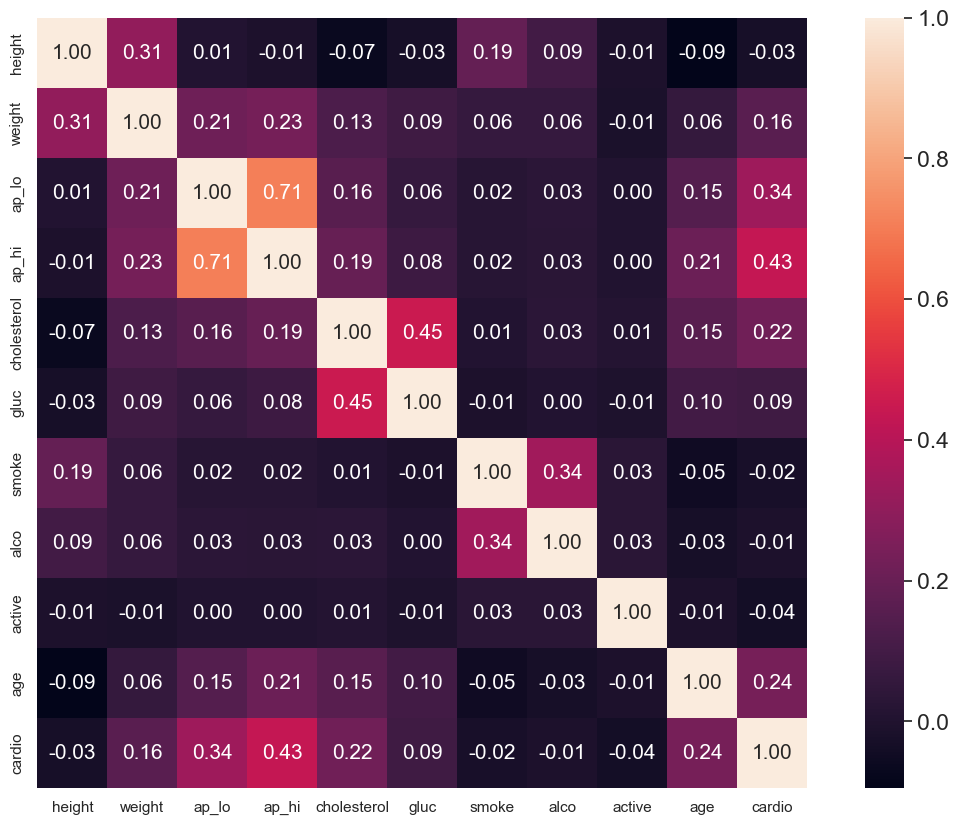

In [17]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [18]:
x = data[['height','weight','ap_lo','ap_hi','cholesterol','gluc','smoke','alco','active','age']]
y = data['cardio']

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'ap_hi'}>,
        <Axes: title={'center': 'ap_lo'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'gluc'}>,
        <Axes: title={'center': 'smoke'}>,
        <Axes: title={'center': 'alco'}>],
       [<Axes: title={'center': 'active'}>,
        <Axes: title={'center': 'cardio'}>, <Axes: >, <Axes: >]],
      dtype=object)

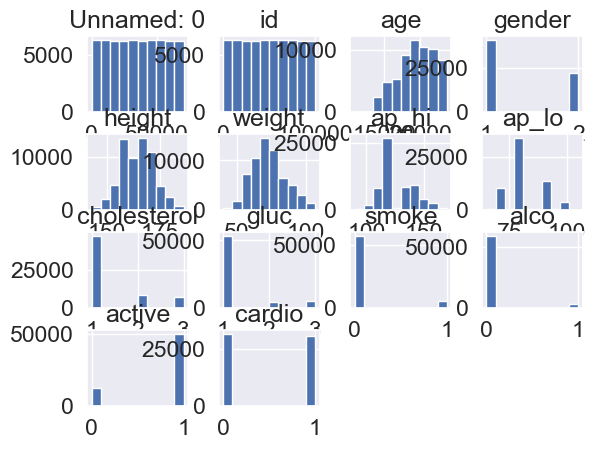

In [19]:
data.hist()

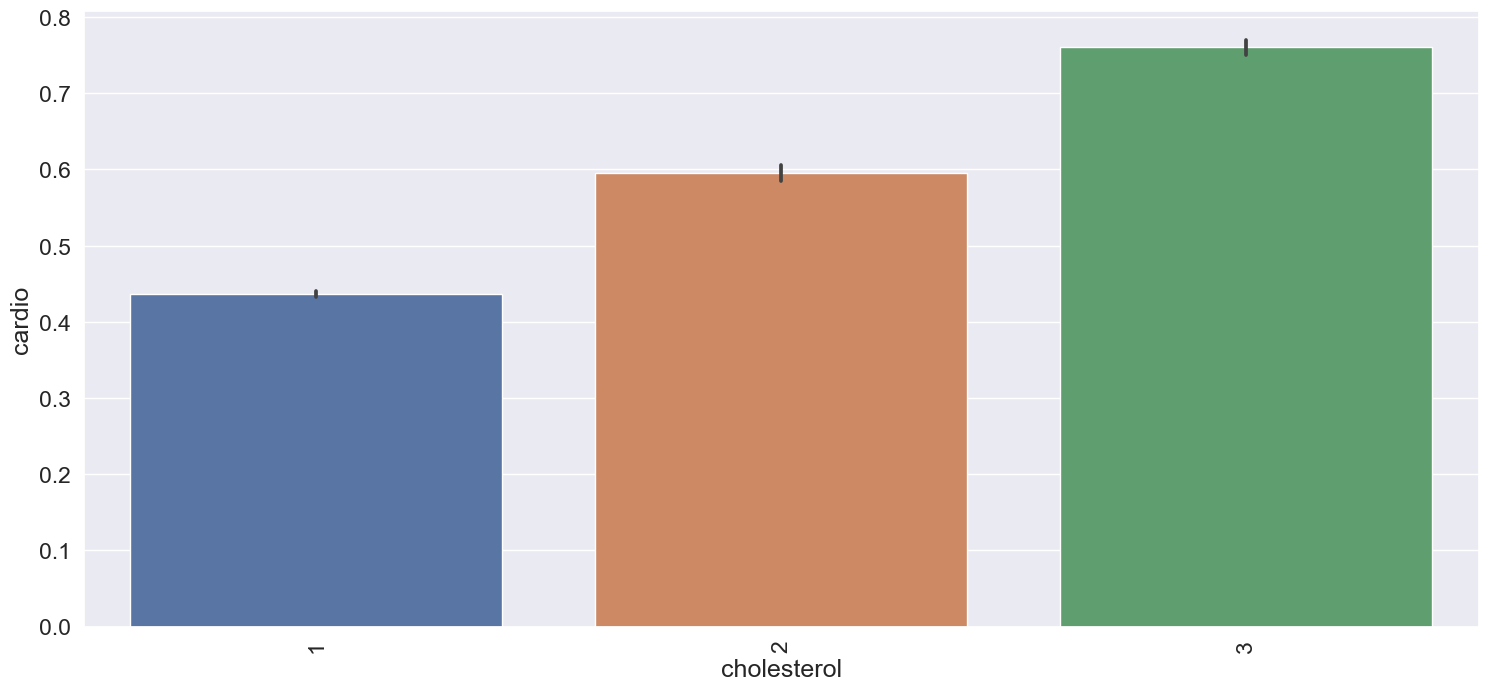

In [20]:
plt.figure(figsize = (18,8))
sns.barplot(x = "cholesterol", y = "cardio", data = data)
plt.xticks(rotation=90)
plt.show()

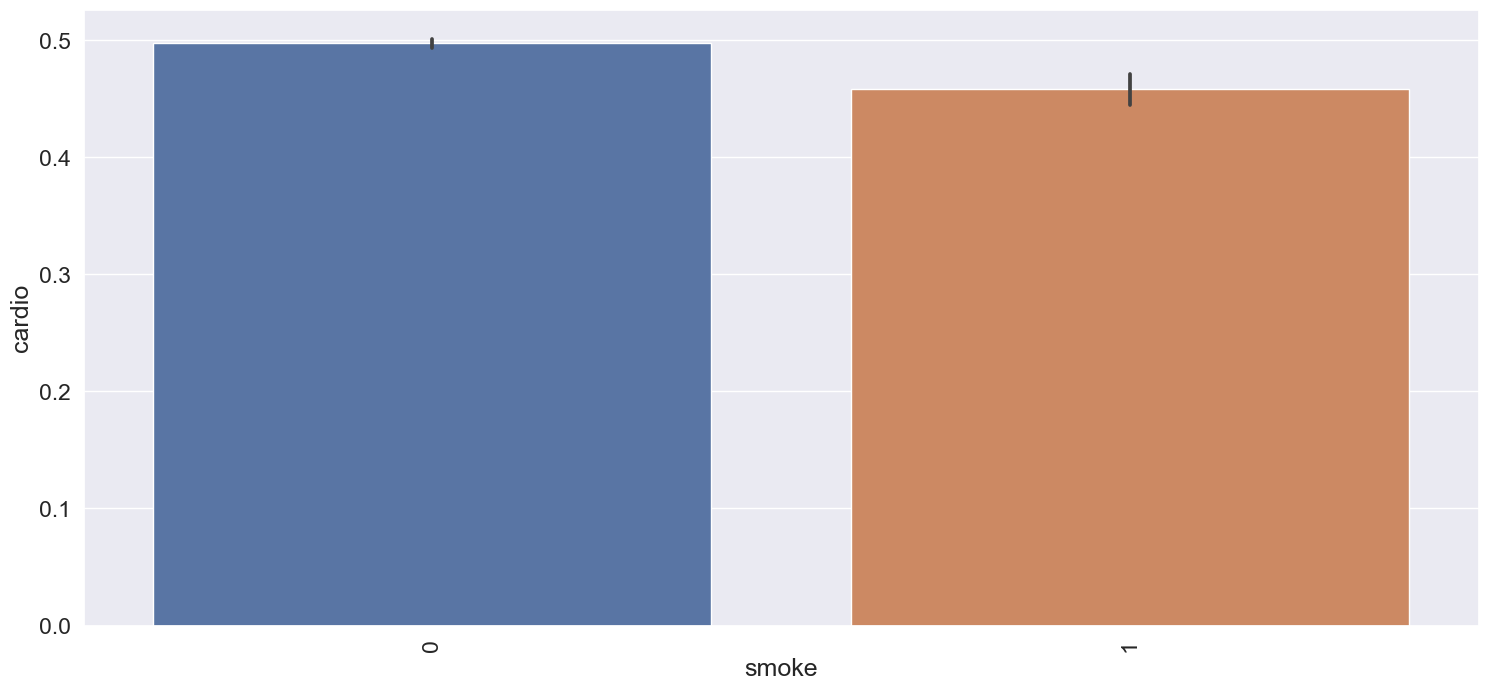

In [21]:
plt.figure(figsize = (18,8))
sns.barplot(x = "smoke", y = "cardio", data = data)
plt.xticks(rotation=90)
plt.show()

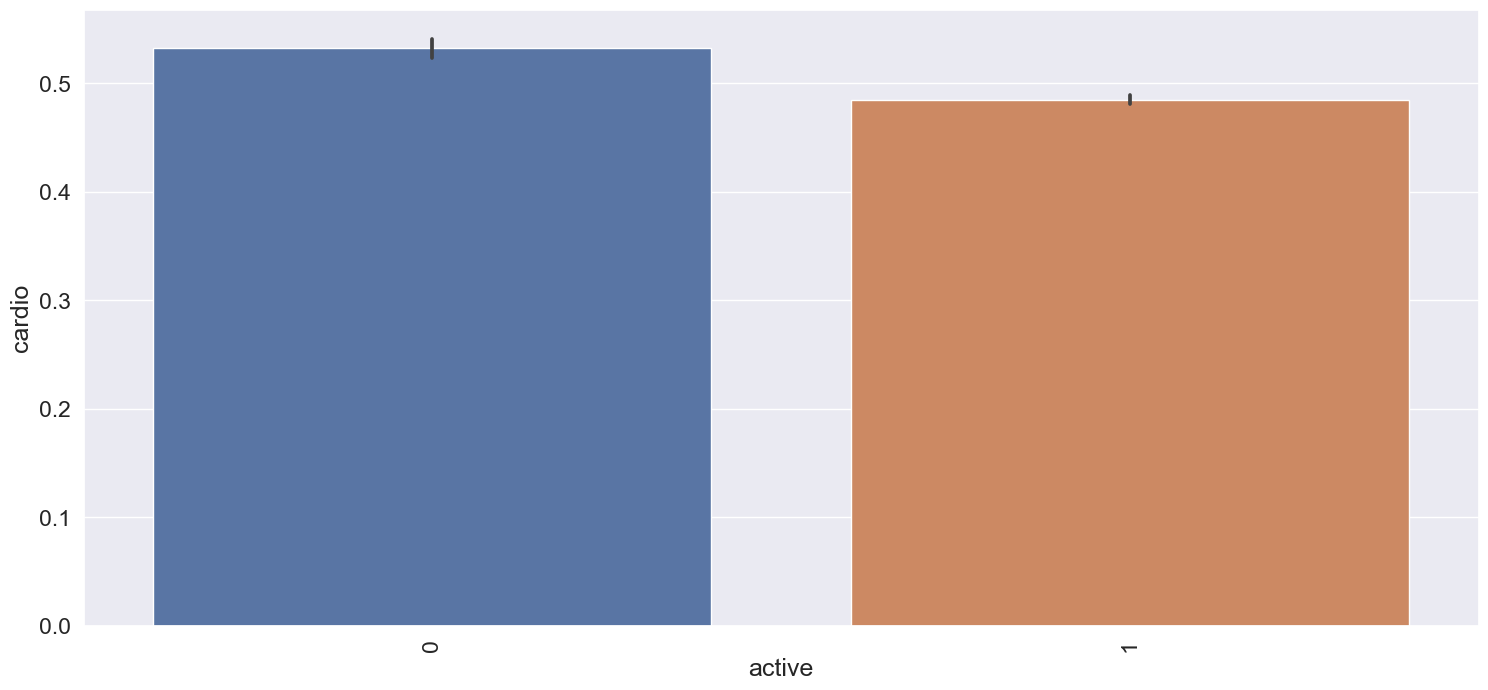

In [22]:
plt.figure(figsize = (18,8))
sns.barplot(x = "active", y = "cardio", data = data)
plt.xticks(rotation=90)
plt.show()

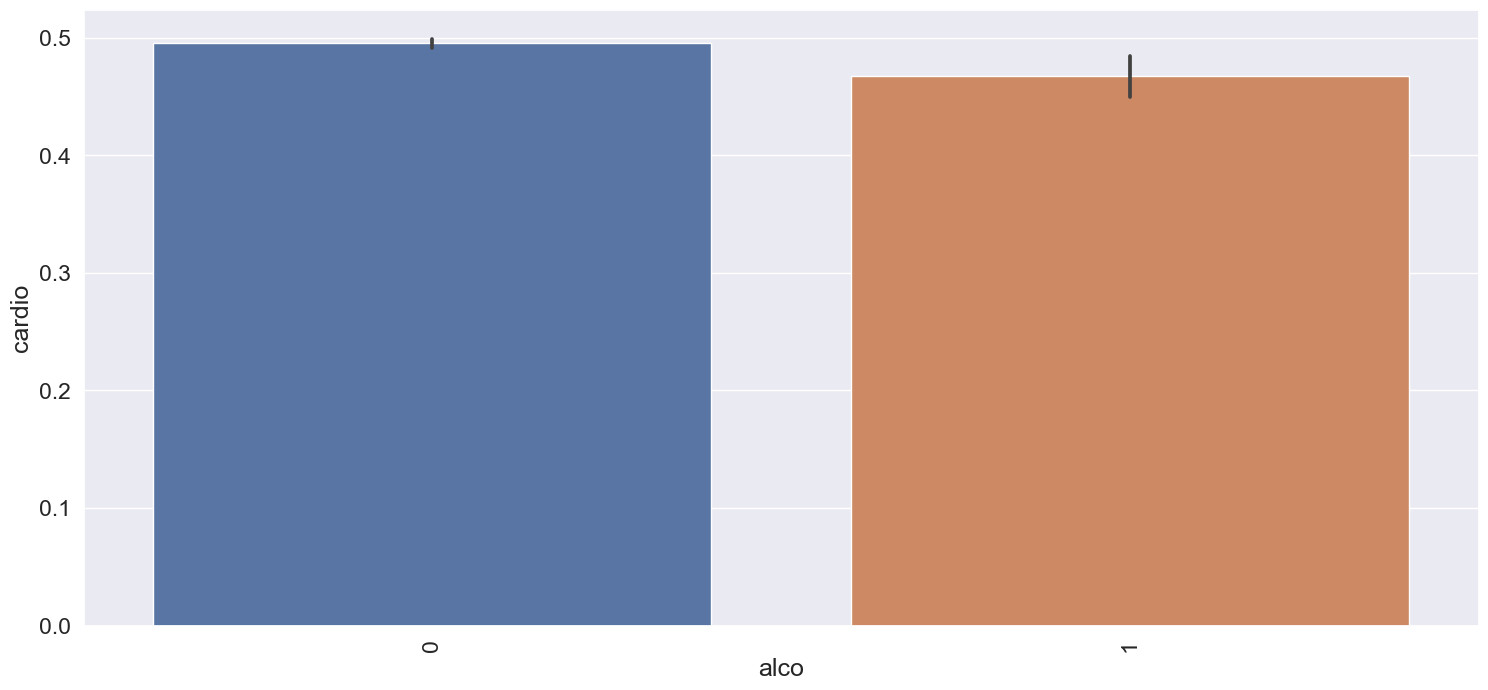

In [23]:
plt.figure(figsize = (18,8))
sns.barplot(x = "alco", y = "cardio", data = data)
plt.xticks(rotation=90)
plt.show()

## Applying Machine Learning Algorithms

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [25]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [26]:
height=int(input("Enter Height (in Cm):"))
weight=int(input("Enter weight (in Kg):"))
ap_lo=int(input("Enter BP Low:"))
ap_hi=int(input("Enter BP High:"))
cholesterol=int(input("Enter Cholesterol Level(1-Normal,2-Mid,3-High):"))
gluc=int(input("Enter Glucose Level(1-Low,2-Normal,3-High):"))
smoke=int(input("Enter Smoke (1-Y,2-N):"))
alco=int(input("Enter Alcohol (1-Y,2-N):"))
active=int(input("Enter Activity  (1-Y,2-N):"))
age=int(input("Enter Age(in year):"))
age=age*365

Enter Height (in Cm):162
Enter weight (in Kg):56
Enter BP Low:78
Enter BP High:122
Enter Cholesterol Level(1-Normal,2-Mid,3-High):2
Enter Glucose Level(1-Low,2-Normal,3-High):3
Enter Smoke (1-Y,2-N):1
Enter Alcohol (1-Y,2-N):1
Enter Activity  (1-Y,2-N):2
Enter Age(in year):25


In [27]:
x = data[['height','weight','ap_lo','ap_hi','cholesterol','gluc','smoke','alco','active','age']]
y = data['cardio']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


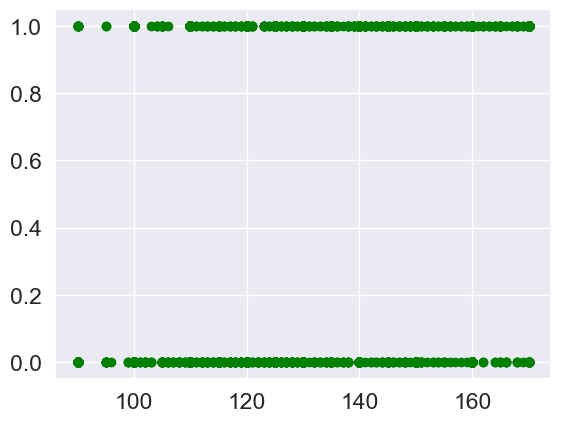

In [29]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
newtrain = np.hsplit(X_train, 10)
X_trainnew=newtrain[3]
plt.scatter(X_trainnew, y_train, color = 'green')

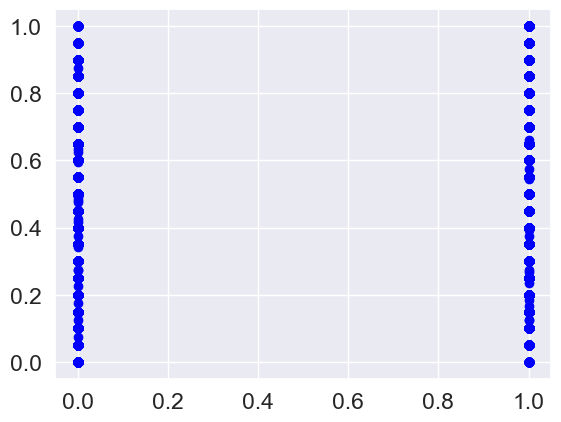

In [30]:
ytest_pred = regressor.predict(X_test)
plt.scatter(y_test,ytest_pred,color='blue')

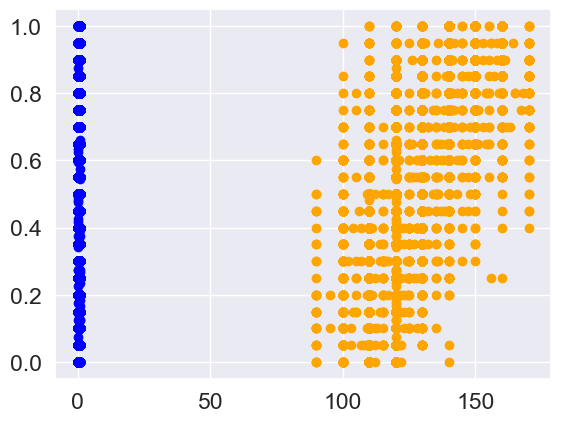

In [31]:
ytest_pred = regressor.predict(X_test)
plt.scatter(y_test,ytest_pred,color='blue')
newtest = np.hsplit(X_test, 10)
X_testnew=newtest[3]
plt.scatter(X_testnew,ytest_pred,color = 'orange')

In [32]:
accuracy=accuracy_score(y_test.round(), ytest_pred.round())
print(", RF Accuracy Score-")
print(accuracy*100,"%")

, RF Accuracy Score-
69.11447084233261 %


In [33]:
newpredicttest = np.array([height,weight,ap_lo,ap_hi,cholesterol,gluc,smoke,alco,active,age]).reshape(1, 10)
Ynewtest_pred = regressor.predict(newpredicttest)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [34]:
print("Result - ",round(Ynewtest_pred[0]))

Result -  0


In [35]:
if round(Ynewtest_pred[0])==0:
    print("Cardiovascular Disease - No,",round(Ynewtest_pred[0]))
if round(Ynewtest_pred[0])==1:
    print("Cardiovascular Disease - Yes,",round(Ynewtest_pred[0]))

Cardiovascular Disease - No, 0


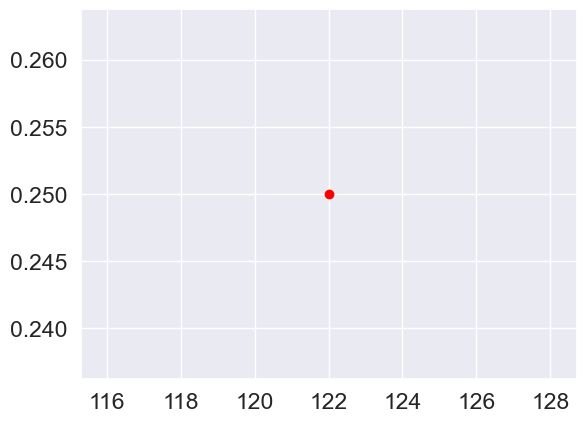

In [36]:
newptest = np.hsplit(newpredicttest, 10)
X_testnewpredict=newptest[3]
plt.scatter(X_testnewpredict,Ynewtest_pred,color = 'red')

In [37]:
accuracy=round(accuracy_score(y_test.round(), ytest_pred.round()), 2)
accuracy=accuracy_score(y_test.round(), ytest_pred.round())
print(", RF Accuracy Score-")
print(accuracy*100,"%")

, RF Accuracy Score-
69.11447084233261 %


# Logistic Regression

In [38]:
y = data["cardio"]
X = data.drop(["cardio"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=1)

In [39]:
log_model = LogisticRegression().fit(X_train, y_train)

In [40]:
# Train Accuracy
y_pred = log_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.6969842412606991

In [41]:
y_prob = log_model.predict_proba(X_test)[:, 1]

y_pred = log_model.predict(X_test)

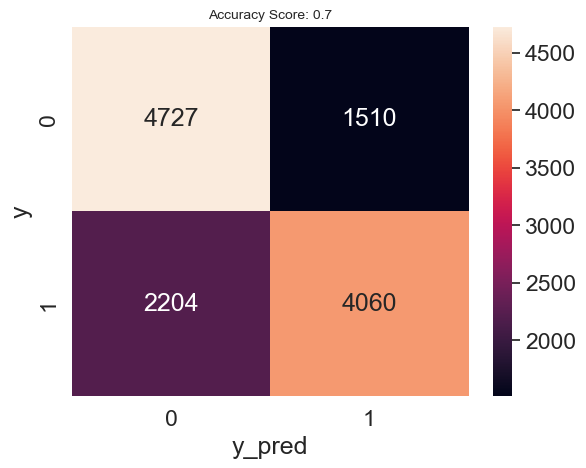

In [42]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [43]:
accuracy_score(y_test, y_pred)

0.7029037676985841

In [44]:
precision_score(y_test, y_pred)

0.7289048473967684

In [45]:
recall_score(y_test, y_pred)


0.6481481481481481

In [46]:
f1_score(y_test, y_pred)

0.6861585262802095

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      6237
           1       0.73      0.65      0.69      6264

    accuracy                           0.70     12501
   macro avg       0.71      0.70      0.70     12501
weighted avg       0.71      0.70      0.70     12501



## K-Nearest Neighbors

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
knn = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred = knn.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.6927445804335653
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70      6237
           1       0.70      0.67      0.69      6264

    accuracy                           0.69     12501
   macro avg       0.69      0.69      0.69     12501
weighted avg       0.69      0.69      0.69     12501



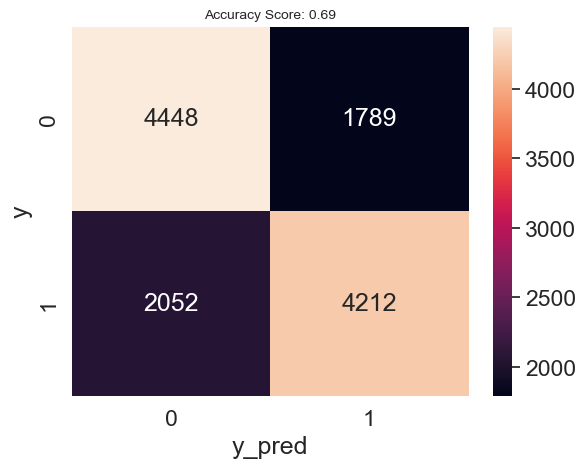

In [53]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)

## SVM

In [54]:
svm = SVC(kernel='linear', C=1.0)

In [55]:
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [56]:
y_pred = svm.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Accuracy: 0.7275417966562675
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.82      0.75      6237
           1       0.78      0.63      0.70      6264

    accuracy                           0.73     12501
   macro avg       0.74      0.73      0.73     12501
weighted avg       0.74      0.73      0.73     12501



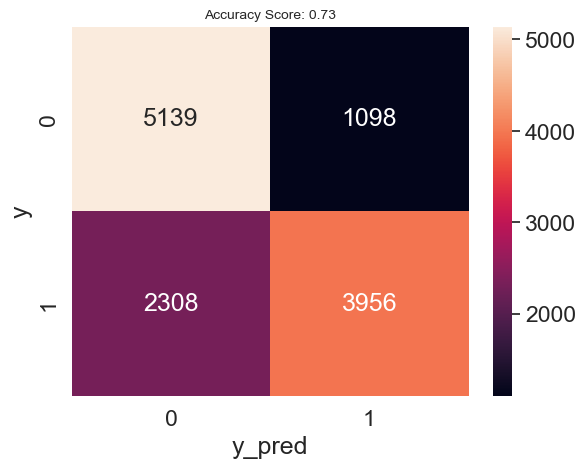

In [58]:
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y_test, y_pred)